In [1]:
from scipy import stats

In [2]:
from gradients import *

In [3]:
surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# pairwise

In [4]:
d1 = pd.read_csv('rois_pairwise_stats.csv')

In [5]:
d1

,indic,roi,pair,tstat,pvalue,signif
0,ecc,0,baseline__early,-0.444305,0.658053,0
1,ecc,0,baseline__late,-0.947098,0.346514,0
2,ecc,0,early__late,-0.440811,0.660569,0
3,ecc,1,baseline__early,-1.124894,0.264084,0
4,ecc,1,baseline__late,-0.886355,0.378151,0
...,...,...,...,...,...,...
14965,grad4,996,baseline__late,-2.472372,0.015599,1
14966,grad4,996,early__late,-0.467313,0.641579,0
14967,grad4,997,baseline__early,-0.038605,0.969304,0
14968,grad4,997,baseline__late,-0.546235,0.586463,0


In [6]:
statistics = ['tstat']
indicators = ['ecc',
#  'grad1'
 ]
data_range = {
    'fstat': (0, 10),
    'tstat': (-3, 3)
}
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'tstat': 'bwr',
    'pvalue': 'gist_gray',
}

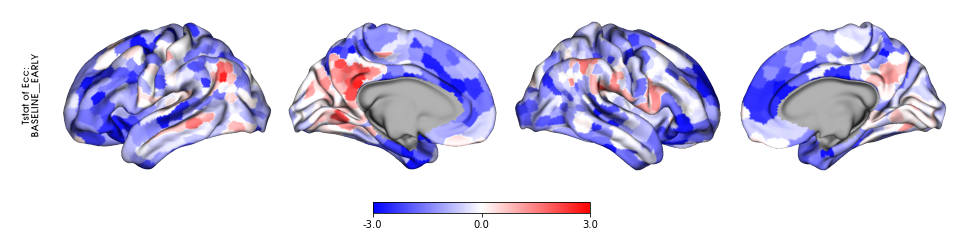

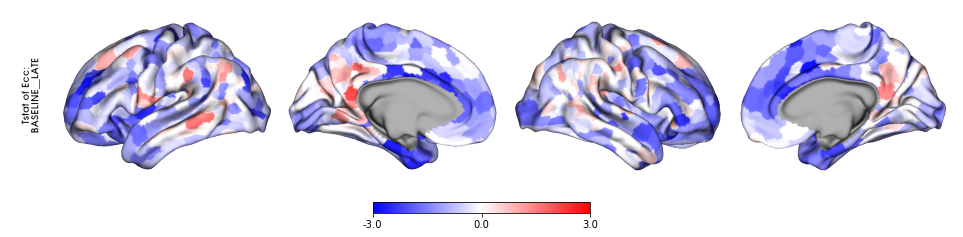

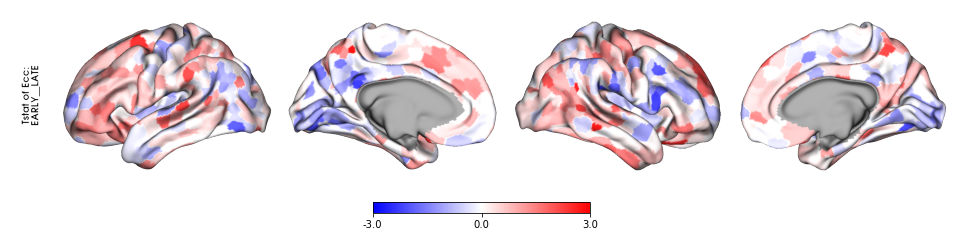

In [7]:
for c in indicators:
    for pair in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == pair)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.capitalize() + ' of ' + c.capitalize() + ':\n' + pair.upper(),
            cmap[s], data_range[s])

# anova

In [8]:
d2 = pd.read_csv('rois_anova_stats.csv')

In [9]:
d2

,indic,roi,fstat,pvalue,signif
0,ecc,0,0.408893,0.665331,0
1,ecc,1,0.747181,0.475947,0
2,ecc,2,0.519728,0.596048,0
3,ecc,3,0.059077,0.942663,0
4,ecc,4,0.173517,0.840919,0
...,...,...,...,...,...
4985,grad4,993,2.180296,0.117579,0
4986,grad4,994,0.119942,0.887081,0
4987,grad4,995,2.071467,0.130597,0
4988,grad4,996,3.372169,0.037683,1


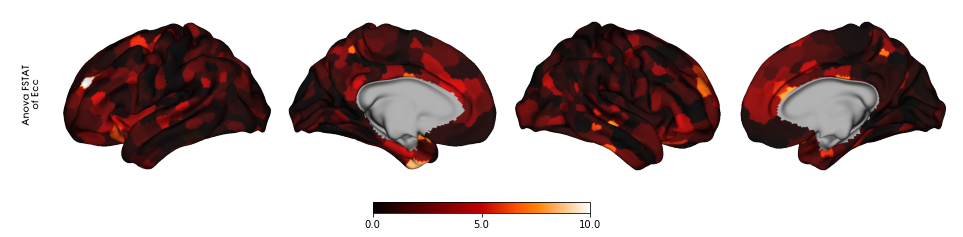

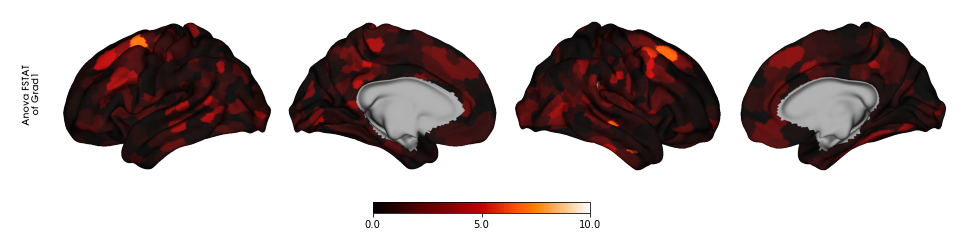

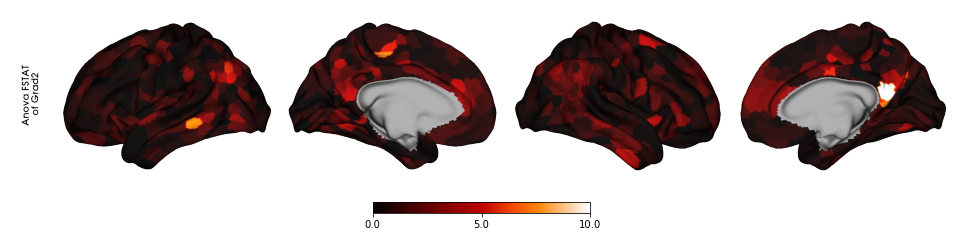

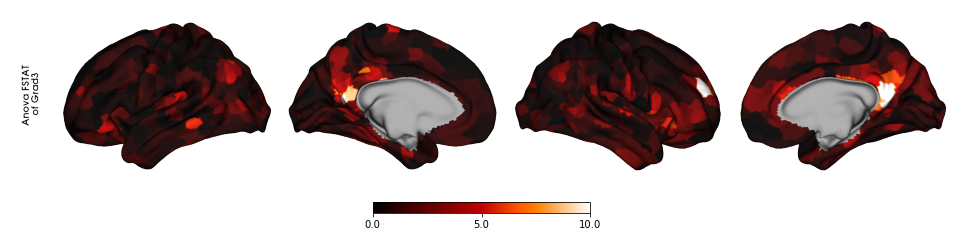

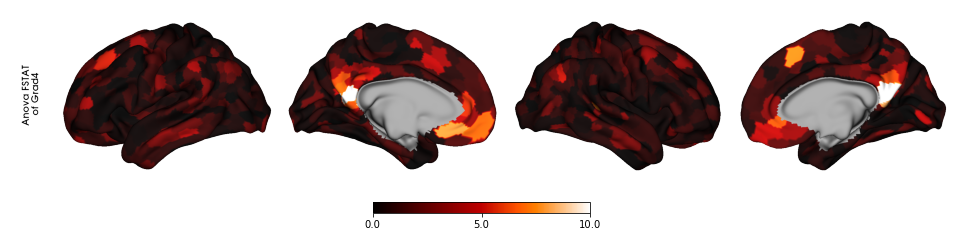

In [10]:
statistics = ['fstat']
indicators = d2.indic.unique()
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'pvalue': 'gist_gray'
}
data_range = {
    'fstat': (0, 10)
}

for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], data_range[s])

# pingouin

In [11]:
import pingouin as pg

In [12]:
df = pd.read_csv('subjects_gradients_ecc.csv')

In [38]:
d = df.groupby(['indic', 'roi']).apply(pg.rm_anova, dv='value', within='epic', subject='subj')

Source  ddof1  ddof2         F     p-unc       np2       eps  \
indic roi                                                                  
ecc   0   0   epic      2     78  0.412618  0.663351  0.010469  0.977595   
      1   0   epic      2     78  0.877221  0.420000  0.021998  0.897917   
      2   0   epic      2     78  0.666878  0.516210  0.016812  0.992531   
      3   0   epic      2     78  0.076593  0.926336  0.001960  0.963704   
      4   0   epic      2     78  0.170718  0.843373  0.004358  0.956310   
...            ...    ...    ...       ...       ...       ...       ...   
grad4 993 0   epic      2     78  3.303644  0.041955  0.078094  0.902548   
      994 0   epic      2     78  0.168505  0.845234  0.004302  0.944212   
      995 0   epic      2     78  2.837848  0.064612  0.067830  0.767592   
      996 0   epic      2     78  4.844000  0.010400  0.110483  0.985125   
      997 0   epic      2     78  0.358042  0.700187  0.009097  0.936078   

             p-GG-corr sphericity   W-spher   p-spher  
indic roi                                              
ecc   0   0        NaN        NaN       NaN       NaN  
      1   0        NaN        NaN       NaN       NaN  
      2   0        NaN        NaN       NaN       NaN  
      3   0        NaN        NaN       NaN       NaN  
      4   0        NaN        NaN       NaN       NaN  
...                ...        ...       ...       ...  
grad4 993 0        NaN        NaN       NaN       NaN  
      994 0        NaN        NaN       NaN       NaN  
      995 0   0.079653      False  0.697225  0.001057  
      996 0        NaN        NaN       NaN       NaN  
      997 0        NaN        NaN       NaN       NaN  

[4990 rows x 11 columns]

In [17]:
ALPHA = 0.05

In [55]:
from sklearn.feature_selection import SelectFdr, chi2
SelectFdr(chi2, alpha=0.01)

In [82]:
d[d['p-unc'] < ALPHA].reset_index().groupby('indic').size()

indic
ecc      239
grad1    163
grad2    158
grad3    225
grad4    151
dtype: int64

In [94]:
d.loc[indic]

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
0,0,epic,2,78,0.412618,0.663351,0.010469,0.977595,NaN,NaN,NaN,NaN
1,0,epic,2,78,0.877221,0.420000,0.021998,0.897917,NaN,NaN,NaN,NaN
2,0,epic,2,78,0.666878,0.516210,0.016812,0.992531,NaN,NaN,NaN,NaN
3,0,epic,2,78,0.076593,0.926336,0.001960,0.963704,NaN,NaN,NaN,NaN
4,0,epic,2,78,0.170718,0.843373,0.004358,0.956310,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,epic,2,78,1.047317,0.355759,0.026152,0.937423,NaN,NaN,NaN,NaN
994,0,epic,2,78,1.984302,0.144356,0.048416,0.942446,NaN,NaN,NaN,NaN
995,0,epic,2,78,0.022711,0.977552,0.000582,0.971218,NaN,NaN,NaN,NaN


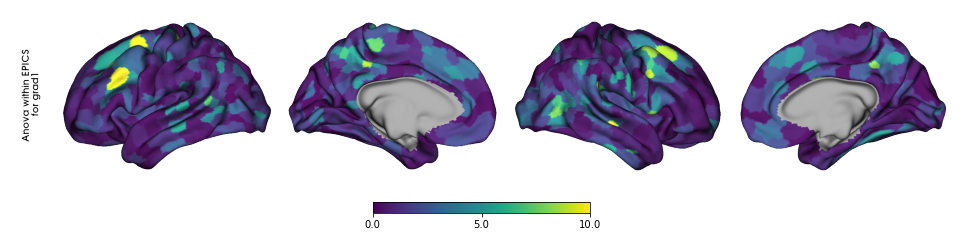

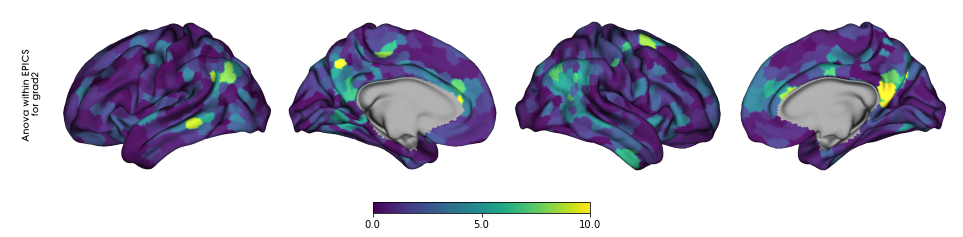

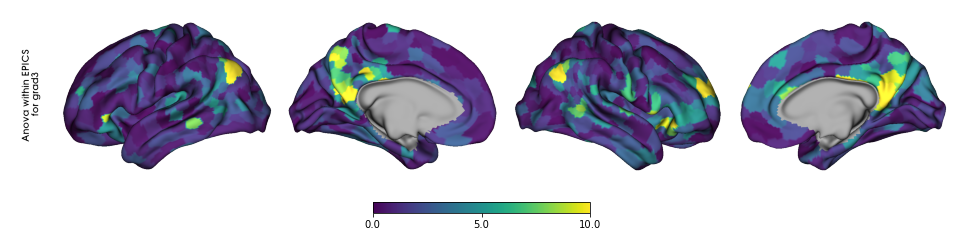

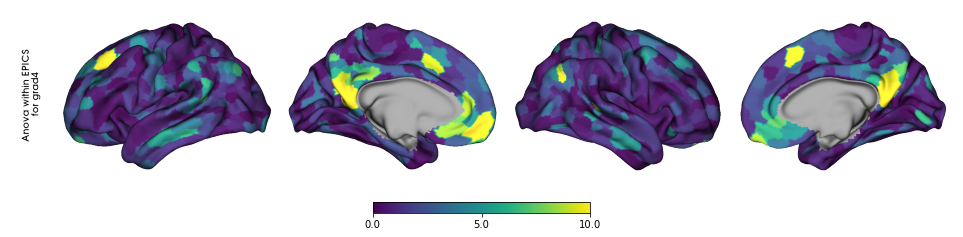

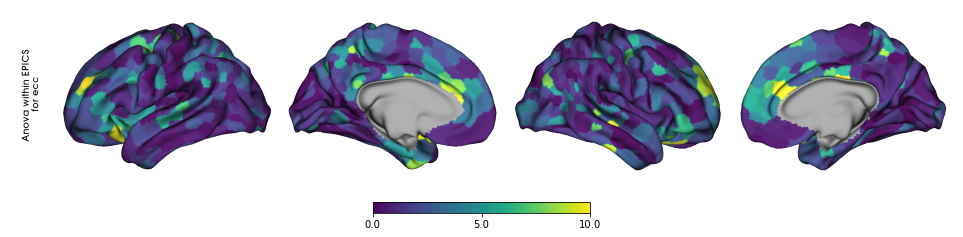

In [95]:
# Anova's F value
data_range = (0, 10)

for indic in df.indic.unique():
    data = d.loc[indic]['F']
    data = np.array(data)
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', data_range)

In [22]:
#todo FDR false discovery rate correction to make the ALPHA

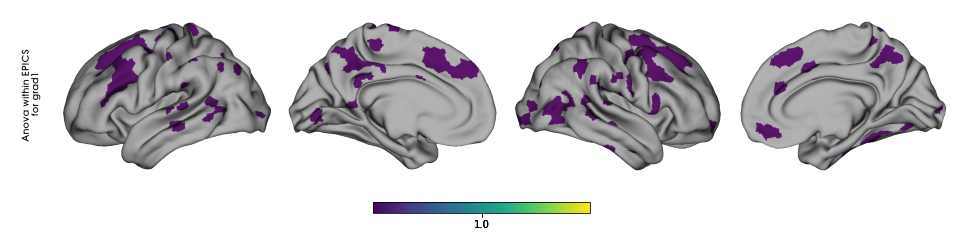

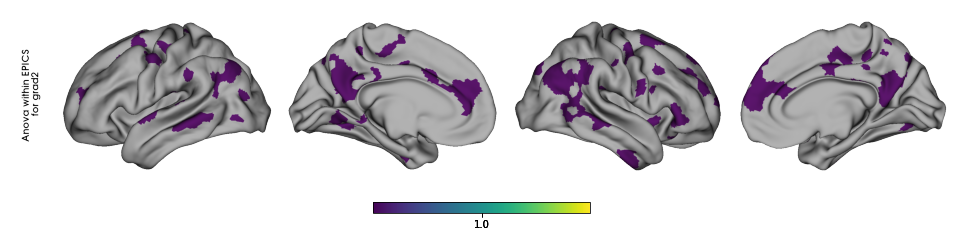

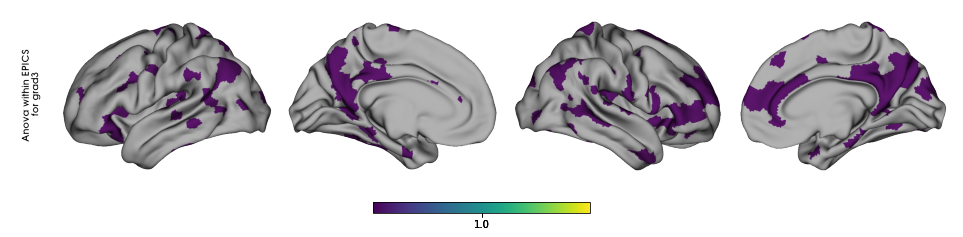

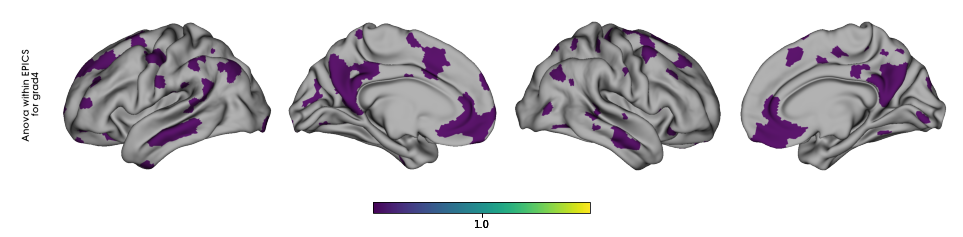

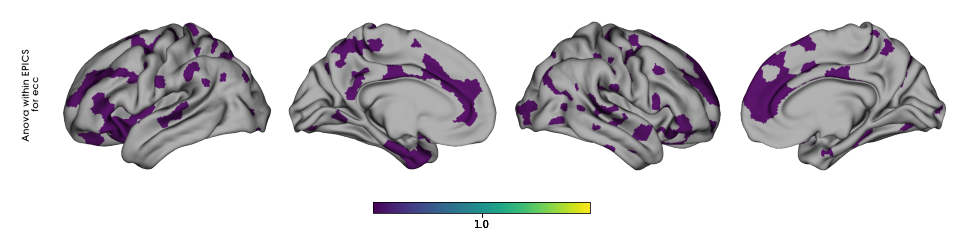

In [ ]:
# significance

for indic in df.indic.unique():
    data = d.loc[indic]
    data = data[data['p-unc'] < ALPHA]
    data = np.array(data)
    data = np.array(d.loc[indic]['p-unc']) < ALPHA
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)